Part a

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time
%matplotlib inline
import numpy as np
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

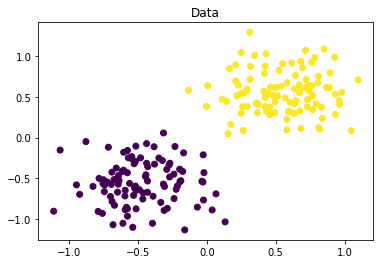

In [2]:
d = 2 
means = np.array([0.5,0.5])
cov = 0.07*np.eye(2)
X1 = np.random.multivariate_normal(means,cov,100)
y1 = np.ones(100)

means = np.array([-0.5,-0.5])
X2 = np.random.multivariate_normal(means,cov,100)
y2 = -1*np.ones(100)

y = np.concatenate([y1,y2])

X, Y = np.concatenate([X1,X2]), np.concatenate([y1,y2])
plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y)
plt.title('Data')
plt.show()


Part b

In [3]:
X = X - np.mean(X,axis=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)
W = np.zeros((2,1))
lr = 1
epochs = []
accuracy = []

for epoch in range(101):
    for idx in range(len(X_train)):
        if Y_train[idx]*X_train[idx,:].reshape(1,-1)@W <= 0:
            # update weights if the point is incorrectly classified
            # W(t+1) = W(t) + lr * y_i*x_i
            W = W + (lr)*Y_train[idx]*X_train[idx,:].reshape(-1,1)
    
    if epoch % 10 == 0:
        Y_test_pred = (X_test@W).reshape(-1)
        Y_test_pred[Y_test_pred < 0] = -1
        Y_test_pred[Y_test_pred >= 0] = 1
        
        acc = np.mean(Y_test == Y_test_pred)
        print(f"Epoch: {epoch}, Test Accuracy: {acc}")   
        epochs.append(epoch)
        accuracy.append(acc)

Epoch: 0, Test Accuracy: 1.0
Epoch: 10, Test Accuracy: 1.0
Epoch: 20, Test Accuracy: 1.0
Epoch: 30, Test Accuracy: 1.0
Epoch: 40, Test Accuracy: 1.0
Epoch: 50, Test Accuracy: 1.0
Epoch: 60, Test Accuracy: 1.0
Epoch: 70, Test Accuracy: 1.0
Epoch: 80, Test Accuracy: 1.0
Epoch: 90, Test Accuracy: 1.0
Epoch: 100, Test Accuracy: 1.0


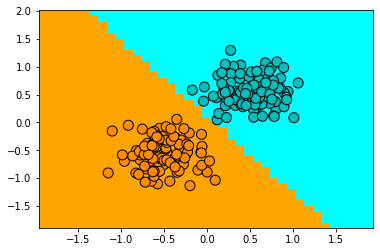

In [4]:
h = 0.1
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ListedColormap(['darkorange', 'c'])

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
Z = Z@W
Z[Z<0] = -1
Z[Z>=0] = 1

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

Plotting a graph of epochs vs accuracy



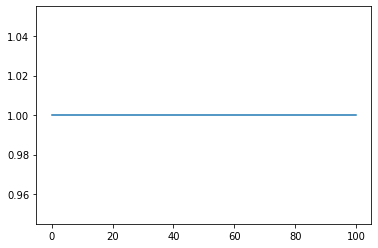

In [5]:
plt.plot(epochs,accuracy)

This implementation converges right away. The accuracy from the epoch 0 till the end is 1. This is because the data is linearly seperable. Therefore its an easy job for a linear classifier like perceptron to achieve convergence.

Part c

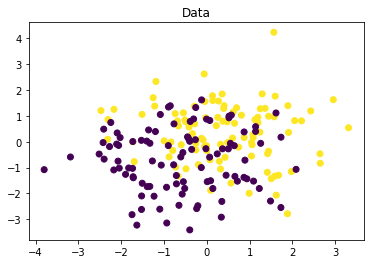

In [6]:
d = 2 
means = np.array([0.5,0.5])
cov = 1.5*np.eye(2)
X1 = np.random.multivariate_normal(means,cov,100)
y1 = np.ones(100)

means = np.array([-0.5,-0.5])
X2 = np.random.multivariate_normal(means,cov,100)
y2 = -1*np.ones(100)

y = np.concatenate([y1,y2])

X, Y = np.concatenate([X1,X2]), np.concatenate([y1,y2])
plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y)
plt.title('Data')
plt.show()

In [0]:
X = X - np.mean(X,axis=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)
W = np.zeros((2,1))
lr = 1
epochs = []
accuracy = []

for epoch in range(101):
    for idx in range(len(X_train)):
        if Y_train[idx]*X_train[idx,:].reshape(1,-1)@W <= 0:
            # update weights if the point is incorrectly classified
            # W(t+1) = W(t) + lr * y_i*x_i
            W = W + (lr)*Y_train[idx]*X_train[idx,:].reshape(-1,1)
    
    if epoch % 10 == 0:
        Y_test_pred = (X_test@W).reshape(-1)
        Y_test_pred[Y_test_pred < 0] = -1
        Y_test_pred[Y_test_pred >= 0] = 1
        
        acc = np.mean(Y_test == Y_test_pred)
        # print(f"Epoch: {epoch}, Test Accuracy: {acc}") 
        epochs.append(epoch)
        accuracy.append(acc)

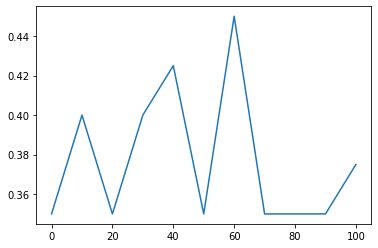

In [8]:
plt.plot(epochs,accuracy)

Because the data is modified to be non-linearly seperable, perceptron algorithm fails to converge at the end of 100 epochs. The perceptron algorithm struggles to converge not because it needs more epochs but because of the nature of the dataset. 

The next plot shows that the perceptron algorithm fails to converge even after 10000 epochs. This shows that a single perceptron is not enough to classify data that is not linearly seperable.

In [0]:
X = X - np.mean(X,axis=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)
W = np.zeros((2,1))
lr = 1
epochs = []
accuracy = []

for epoch in range(10001):
    for idx in range(len(X_train)):
        if Y_train[idx]*X_train[idx,:].reshape(1,-1)@W <= 0:
            # update weights if the point is incorrectly classified
            # W(t+1) = W(t) + lr * y_i*x_i
            W = W + (lr)*Y_train[idx]*X_train[idx,:].reshape(-1,1)
    
    if epoch % 10 == 0:
        Y_test_pred = (X_test@W).reshape(-1)
        Y_test_pred[Y_test_pred < 0] = -1
        Y_test_pred[Y_test_pred >= 0] = 1
        
        acc = np.mean(Y_test == Y_test_pred)
        # print(f"Epoch: {epoch}, Test Accuracy: {acc}") 
        epochs.append(epoch)
        accuracy.append(acc)

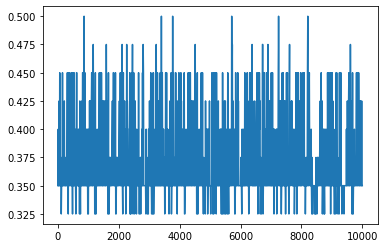

In [10]:
plt.plot(epochs,accuracy)

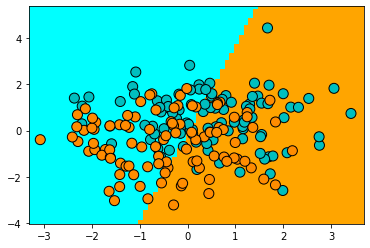

In [11]:
h = 0.1
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ListedColormap(['darkorange', 'c'])

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
Z = Z@W
Z[Z<0] = -1
Z[Z>=0] = 1

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()